<center><h1> Kernels </h1></center>
# 1. Basic
We define a **kernel function** to be a real-valued function of two samples $\mathcal{k}(\vec{x},\vec{x}') \in \mathbb{R}$,for $\vec{x},\vec{x}' \in \mathcal{X}$. There are two reasons why using kernels.
* Sometimes, the data in raw representation $\vec{x}$ is not linear separation. For many algorithms that solve these tasks, the data in raw representation have to be explicitly transformed into higher feature space via a user-specified non-linear feature map $\phi(\vec{x})$, which might be computation intensive. By using kernels, we don't need to explicitly specify the feature map. Instead, we define a kernel function, which measures the similarity over pairs of samples in raw representation. The kernel function usually implicit a feature map. The kernel method is often computationally cheaper than the explicit computation of feature map.


* Sometimes, it's not clear how to represent the inputs as fixed-sized feature vectors, such as a text document or protein sequence. One approach is to assume that we have some way of measuring the similarity between objects, which doesn't require preprocessing them into feature vector format. Let $\mathcal{k}(\vec{x}',\vec{x})=\mathcal{k}(\vec{x},\vec{x}') \geq 0$ be some measure of similarity between objects $\vec{x},\vec{x}' \in \mathcal{X}$. **Then we can use $\left[\mathcal{k}(\vec{x}',\vec{x}_1),\mathcal{k}(\vec{x}',\vec{x}_2,\ldots,\mathcal{k}(\vec{x}',\vec{x}_N))\right]$ as feature vectors**.

Some methods that we will study require that the kernel function satisfy the requirement that **Gram matrix**
$$ \mathbf{K} = \begin{bmatrix}
\mathcal{k}(\vec{x}_1,\vec{x}_1) & \ldots & \mathcal{k}(\vec{x}_1,\vec{x}_N)\\
\vdots & \ddots & \vdots \\
\mathcal{k}(\vec{x}_N,\vec{x}_1) & \ldots & \mathcal{k}(\vec{x}_N,\vec{x}_N)
\end{bmatrix}  $$
be positive definite for any set of $\{\vec{x}_i\}_{i=1}^N$. We call such a kernel a **Mercer kernel** or **positive definite kernel**.

If $\mathbf{K}$ is positive definite, we can compute an eigenvector decomposition of it as follows
$$
\mathbf{K}=\mathbf{U}^T\Lambda\mathbf{U}
$$
Consider one of the element of $\mathbf{K}$
\begin{align}
k_{ij} &=\mathcal{k}(\vec{x}_i,\vec{x}_j)   \\
       &=(\mathbf{U}_{:\,,i})^T \Lambda (\mathbf{U}_{:\,,j}) \\
       &=(\Lambda^{\frac{1}{2}}\mathbf{U}_{:\,,i})^T(\Lambda^{\frac{1}{2}}\mathbf{U}_{:\,,j}) 
\end{align}
Let us define $\phi(\vec{x}_i)=(\Lambda^{\frac{1}{2}}\mathbf{U}_{:\,,i})$, then we can write
$$
\mathcal{k}_{ij}=\phi(\vec{x}_i)^T \phi(\vec{x}_j)
$$
Thus we see that the entries in the kernel matrix can be computed by performing an inner product of some feature vectors that are implicitly defined by the eigenvectors $U$. In general, if the kernel is Mercer, then there exists a function $\phi$ mapping $\vec{x} \in \mathcal{X}$ to $\phi(\vec{x})$ such that
$$
\mathcal{k}(\vec{x}_i,\vec{x}_j)=\phi(\vec{x}_i)^T \phi(\vec{x}_j)
$$

# 2. Some kernels
## 2.1 RBF kernels
The **squared exponential kernel** or **Gaussian kernel** is defined by
$$
\mathcal{k}(\vec{x},\vec{x}')=exp\left(-\frac{1}{2}(\vec{x}-\vec{x}')^T\Sigma^{-1}(\vec{x}-\vec{x}')\right)
$$
Gaussian kernel is Mercer, whose feature map lives in an infinite dimensional space.

If $\Sigma$ is spherical diagonal, this can be written as 
$$
\mathcal{k}(\vec{x},\vec{x}')=exp\left(-\frac{\|\vec{x}-\vec{x}'\|^2}{2\sigma^2}\right)
$$
which is an example of the **radial basis function (RBF)** kernel,since it is only a function of $\|\vec{x}-\vec{x}'\|$.
## 2.2 Kernels for comparing documents (cosine similarity kernel)
If we use a bag of words representation, where $x_{ij}$ is the number of times words $j$ occurs in document $i$, we can define the **cosine similarity**
$$
\mathcal{k}(\vec{x}_i,\vec{x}_{i'})=\frac{\vec{x}_i^T\vec{x}_{i'}}{\|\vec{x}_i\|_2\,\|\vec{x}_{i'}\|_2}
$$
Unfortunately, this simple method does not work very well, for two main reasons.
* Some popular words are not discriminative, such as "the" and "and"
* The word usage tends to be bursty, which means that once a word is used in a document it's likely to be used again. Therefore, the similarity might be artificially boosted.

We can significantly improve performance using **TF-IDF** representation
$$
\text{tf-idf}(x_{ij})=log\,(1+x_{ij})\,\times\,log\,\frac{N}{1+\sum_{n=1}^N \mathbb{1}(x_{nj}>0)}
$$

Text(0.5,1,'Tf-idf vectorizer')

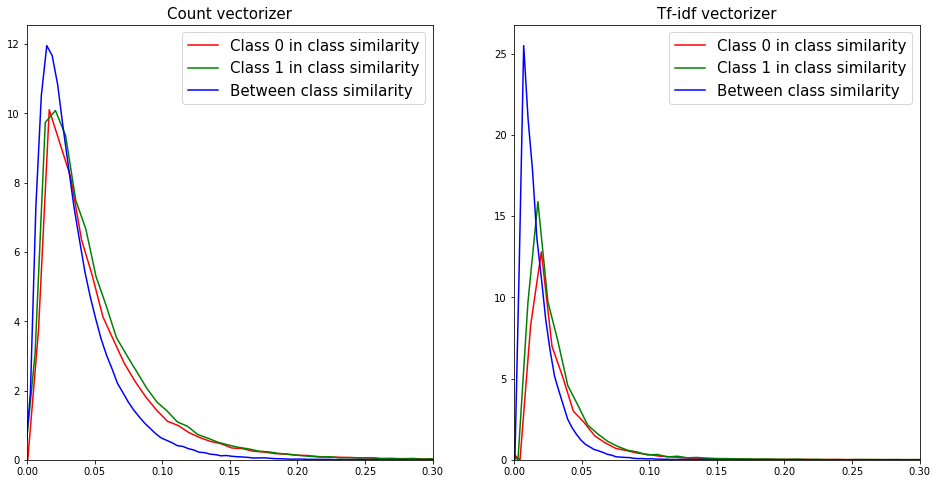

In [2]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
import scipy as sc
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,8))

categories = ['talk.politics.misc', 'sci.space']
newsgroups=fetch_20newsgroups(subset='train',
                              remove=('headers', 'footers', 'quotes'),
                              categories=categories)

plt.subplot(1,2,1)
count_vectorizer=CountVectorizer(stop_words="english")
count_features=count_vectorizer.fit_transform(newsgroups.data)
count_features=normalize(count_features)
count_features_class0=count_features[newsgroups.target==0]
count_features_class1=count_features[newsgroups.target==1]

inclass_similarity_0=count_features_class0*count_features_class0.transpose()
inclass_similarity_0=inclass_similarity_0.todense().reshape(-1)
# remove the diagonal
inclass_similarity_0=inclass_similarity_0[inclass_similarity_0<0.999999]
sns.distplot(inclass_similarity_0,
             hist=False,
             kde=True,
             kde_kws={'color':'r'},
             label="Class 0 in class similarity")

inclass_similarity_1=count_features_class1* count_features_class1.transpose()
inclass_similarity_1=inclass_similarity_1.todense().reshape(-1)
inclass_similarity_1=inclass_similarity_1[inclass_similarity_1<0.999999]
sns.distplot(inclass_similarity_1,
             hist=False,
             kde=True,
             kde_kws={'color':'g'},
             label="Class 1 in class similarity")


between_class_similarity=count_features_class0* count_features_class1.transpose()
between_class_similarity=between_class_similarity.todense().reshape(-1)
between_class_similarity=between_class_similarity[between_class_similarity<0.999999]
sns.distplot(between_class_similarity,
             hist=False,
             kde=True,
             kde_kws={'color':'b'},
             label="Between class similarity")
plt.xlim([0.0,0.3])
plt.legend(fontsize=15)
plt.title("Count vectorizer",fontsize=15)

plt.subplot(1,2,2)
tfidf_vectorizer=TfidfVectorizer(stop_words="english")
tfidf_features=tfidf_vectorizer.fit_transform(newsgroups.data)
tfidf_features=normalize(tfidf_features)
tfidf_features_class0=tfidf_features[newsgroups.target==0]
tfidf_features_class1=tfidf_features[newsgroups.target==1]

inclass_similarity_0=tfidf_features_class0*tfidf_features_class0.transpose()
inclass_similarity_0=inclass_similarity_0.todense().reshape(-1)
# remove the diagonal
inclass_similarity_0=inclass_similarity_0[inclass_similarity_0<0.999999]
sns.distplot(inclass_similarity_0,
             hist=False,
             kde=True,
             kde_kws={'color':'r'},
             label="Class 0 in class similarity")

inclass_similarity_1=tfidf_features_class1* tfidf_features_class1.transpose()
inclass_similarity_1=inclass_similarity_1.todense().reshape(-1)
inclass_similarity_1=inclass_similarity_1[inclass_similarity_1<0.999999]
sns.distplot(inclass_similarity_1,
             hist=False,
             kde=True,
             kde_kws={'color':'g'},
             label="Class 1 in class similarity")

between_class_similarity=tfidf_features_class0* tfidf_features_class1.transpose()
between_class_similarity=between_class_similarity.todense().reshape(-1)
between_class_similarity=between_class_similarity[between_class_similarity<0.999999]
sns.distplot(between_class_similarity,
             hist=False,
             kde=True,
             kde_kws={'color':'b'},
             label="Between class similarity")
plt.xlim([0.0,0.3])
plt.legend(fontsize=15)
plt.title("Tf-idf vectorizer",fontsize=15)

## 2.3 Linear kernels
Deriving the feature vector implied by a kernel is in general quite difficult, and only possible if the kernel is Mercer. However, deriving a kernel from a feature vector is easy: we just use
$$
\mathcal{k}(\vec{x}_i,\vec{x}_j)=\phi(\vec{x}_i)^T \phi(\vec{x}_j)
$$
if $\phi(\vec{x})=\vec{x}$, we get the **linear kernel**,defined by
$$
\mathcal{k}(\vec{x}_i,\vec{x}_j)=\vec{x}_i^T \vec{x}_j
$$
This is useful if the original data is already high dimensional, and if the original features are individually informative.
## 2.4 Matern kernels
The **Matern kernel**, which is commonly used in Gaussian process regression, has the following form
$$
\mathcal{k}(r)=\frac{2^{1-\nu}}{\Gamma(\nu)}\left(\frac{\sqrt{2\nu}r}{l}\right)^\nu K_\nu\left(\frac{\sqrt{2\nu}r}{l}\right)
$$
where $r=\|\vec{x}-\vec{x}'\|,\nu>0,l>0$, and $K_\nu$ is a modified Bessel function.

As $\nu \rightarrow \infty$, this approaches the Gaussian kernel.

If $\nu=\frac{1}{2}$, the kernel simplifies to
$$
k(r)=exp\left(-\frac{r}{l}\right)
$$
# 3. Using kernels inside GLMs
## 3.1 Kernel machines
We define a **kernel machine** to be a GLM where the input feature vector has the form
$$
\phi(\vec{x})=\big[\mathcal{k}(\vec{x},\vec{\mu}_1),\ldots,\mathcal{k}(\vec{x},\vec{\mu}_K)\big]
$$
where $\vec{\mu}_k \in \mathcal{X}$ are a set of $K$ **centroids**. We will call $\phi(\vec{x})$ a kernelised feature vector. We can use the kernelised feature vector for logistic regression by defining
$$
p(y|\vec{x},\vec{\theta})=Ber(sigm(\vec{w}^T\phi(\vec{x})))
$$
which provides a simple way to define a non-linear decision boundary.

We can also use the kernelized feature vector inside a linear regression model by defining 
$$
p(y|\vec{x},\vec{\theta})=\mathcal{N}(\vec{w}^T\phi(\vec{x}),\sigma^2)
$$
## 3.2 L1VMs, RVMs, and other sparse vector machines
The main issue with kernel machines is: how do we choose the centroids $\vec{\mu}_k$. If the input is
low-dimensional Euclidean space, we can uniformly tile the space occupied by the data with prototypes.However, this approach breaks down in higher numbers of dimensions because of the curse of dimensionality.

A simple approach is to make each sample to be a prototype, so we get
$$
\phi(\vec{x})=\big[\mathcal{k}(\vec{x},\vec{x}_1),\ldots,\mathcal{k}(\vec{x},\vec{x}_N)\big]
$$
Now we see $D=N$, so we have as many parameters as data points.However, we can use any of the sparsity-promoting priors for $\vec{w}$ to efficiently select a subset of the training samples. We call this a **sparse vector machine**.

The most natural choice is to use $l$1-regularization,which leads to **$l$1-regularized vector machine (L1VMs)**.

We can get even greater sparsity by using ARD/SBL, resulting in a method called the **relevance vector machine (RVM)**.

Another very popular approach to creating a sparse kernel machine is to use a **support vector machine** or **SVM**. This will be discussed in detail later.

# 4. Kernel trick
Rather than defining our feature vector in terms of kernels $\phi(\vec{x})=\big[\mathcal{k}(\vec{x},\vec{x}_1),\ldots,\mathcal{k}(\vec{x},\vec{x}_N)\big]
$, we can instead work with the original feature vectors $\vec{x}$ ,but modify the algorithm so that it replaces all inner products of the form $\vec{x}^T\vec{x}'$ with a call to the kernel function $\mathcal{k}(\vec{x},\vec{x}')$, which implicit a feature map $\phi(\vec{x})$. This is called the **kernel trick**.It turns out that many algorithms can be kernelized in this way. We give some examples below. Note that we require that the kernel be a Mercer kernel for this trick
to work.
## 4.1 Kernelized nearest neighbor classification
For KNN classification, we need to calculate the Euclidean distance of a test vector to all the training points and find the top k closest points. This can be kernelized by observing that
$$
\|\vec{x}-\vec{x}'\|_2^2=\vec{x}^T\vec{x}+\vec{x}'^T\vec{x}'-2\vec{x}^T\vec{x}'
$$
which allows us to apply the nearest neighbor classifier to structured data objects by defining a kernel.
## 4.2 Kernelized K-medoids clustering
K-means uses Euclidean distance to measure dissimilarity,which is not always appropriate for structured objects.

The first step is to replace the K-means algorithm with the K-medoids algorothm. This is similar to K-means, but instead of representing each cluster’s centroid by the mean of all data vectors assigned to this cluster, we make each centroid be one of the data vectors themselves. Thus we always deal with integer indexes, rather than data objects. We assign objects to their closest centroids as before. When we update the centroids, we look at each object that belongs to the cluster, and measure the sum of its distances to all the others in the same cluster; we then pick the one which has the smallest such sum:
$$
\vec{m}_k=\underset{i:z_i=k}{argmin}\sum_{i':z_{i'}=k} d(i,i')
$$
where 
\begin{align}
d(i,i') &=\|\vec{x}_i-\vec{x}_{i'}\|_2^2  \\
        &=\vec{x}_i^T\vec{x}_i+\vec{x}_{i'}^T\vec{x}_{i'}-2\vec{x}_i^T\vec{x}_{i'}
\end{align}
## 4.3 Kernelized ridge regression
Applying the kernel trick to distance-based methods was straightforward. It is not so obvious how to apply it to parametric models such as ridge regression. However, it can be done, as we now explain.
### 4.3.1 The primal problem
Let $\vec{x} \in R^D$ be some feature vector, and $\mathbf{X}$ be the corresponding $N \times D$ design matrix. We want to minimize
$$
\mathcal{J}(\vec{w})=(\vec{y}-\mathbf{X}\vec{w})^T(\vec{y}-\mathbf{X}\vec{w})+\lambda\|\vec{w}\|^2
$$
The optimal solution is given by
\begin{align}
\vec{w}  &=(\mathbf{X}^T\mathbf{X}+\lambda\mathbf{I}_D)^{-1}\mathbf{X}^T\vec{y} \\
\end{align}
### 4.3.2 The dual problem
The optimal solution is not yet in the form of inner products.However, using the matrix inversion lemma we rewrite the ridge estimate as follows
$$
\vec{w}=\mathbf{X}^T(\mathbf{X}\mathbf{X}^T+\lambda\mathbf{I}_N)^{-1}\vec{y}
$$
Let us define the following **dual variable**
$$
\vec{\alpha}=(\mathbf{X}\mathbf{X}^T+\lambda\mathbf{I}_N)^{-1}\vec{y}
$$
Then we can rewrite the **primal variables** as follows
$$
\vec{w}=\mathbf{X}^T\vec{\alpha}=\sum_{i=1}^N \alpha_i\vec{x}_i
$$
which tells us that the solution vector is just a linear sum of the N training vectors. When we plug this in at test time to compute the predictive mean, we get
$$
\hat{y}=\vec{w}^T\vec{x}=\sum_{i=1}^N \alpha_i \vec{x}_i^T \vec{x}=\sum_{i=1}^N \alpha_i \mathcal{k}(\vec{x},\vec{x}_i)
$$
So we have succesfully kernelized ridge regression by changing from primal to dual variables. This technique can be applied to many other linear models, such as logistic regression.
## 4.4 Kernel PCA
Consider a data set $\{\vec{x}\}_{n=1}^N \in R^D$. We will always assume that we have centered the samples, which means $\sum_n \vec{x}_n=\mathbf{0}$.

Now consider a nonlinear transformation $\phi(\vec{x})$ into an $M$-dimensional feature space, so that each data point $\vec{x}_n$ is thereby projected onto a point $\phi(\vec{x}_n) \in \mathbb{R}^M$.The projected data points after centralizing, denoted $\tilde{\phi}(\vec{x}_n)$ are given by
$$
\tilde{\phi}(\vec{x}_n)=\phi(\vec{x}_n)-\frac{1}{N}\sum_{l=1}^N\phi(\vec{x}_l)
$$
The corresponding  Gram matrix is given by
\begin{align}
\tilde{\mathbf{K}}_{nm}  &=\tilde{\phi}(\vec{x}_n)^T\tilde{\phi}(\vec{x}_m) \\
                         &=\left(\phi(\vec{x}_n)-\frac{1}{N}\sum_{l=1}^N\phi(\vec{x}_l)\right)^T \left(\phi(\vec{x}_m)-\frac{1}{N}\sum_{l=1}^N\phi(\vec{x}_l)\right) \\
                         &=\phi(\vec{x}_n)^T\phi(\vec{x}_m)-\frac{1}{N}\sum_{l=1}^N\phi(\vec{x}_n)^T\phi(\vec{x}_l)-\frac{1}{N}\sum_{l=1}^N\phi(\vec{x}_l)^T\phi(\vec{x}_m)+\frac{1}{N^2}\sum_{j=1}^N\sum_{l=1}^N\phi(\vec{x}_j)^T\phi(\vec{x}_l) \\
                         &=\mathcal{k}(\vec{x}_n,\vec{x}_m)-\frac{1}{N}\sum_{l=1}^N\mathcal{k}(\vec{x}_l,\vec{x}_m)-\frac{1}{N}\sum_{l=1}^N\mathcal{k}(\vec{x}_n,\vec{x}_l)+\frac{1}{N^2}\sum_{j=1}^N\sum_{l=1}^N\mathcal{k}(\vec{x}_j,\vec{x}_l) \\
\end{align}
which can be expressed in matrix notation as
$$
\tilde{\mathbf{K}}=\mathbf{K}-\frac{1}{N}\mathbf{1}_N\mathbf{K}-\frac{1}{N}\mathbf{K}\mathbf{1}_N+\frac{1}{N^2}\mathbf{1}_N\mathbf{K}\mathbf{1}_N
$$
which means we can use the un-centering Gram matrix to calculate the centered Gram matrix.

The $M \times M$ sample covariance matrix in feature space is given by
$$
C=\frac{1}{N}\sum_{n=1}^N \tilde{\phi}(\vec{x}_n)\tilde{\phi}(\vec{x}_n)^T
$$
and its eigenvector is defined by
$$
C\vec{v}_i=\lambda_i \vec{v}_i
$$
where $i=1,\ldots,M$. Our goal is to solve this eigenvalue problem without having to work explicitly in the feature space.

From the definition of $C$, the eigenvector equations tells us that $\vec{v}_i$ satisfies
$$
\frac{1}{N}\sum_{n=1}^N \tilde{\phi}(\vec{x}_n)\left\{\tilde{\phi}(\vec{x}_n)^T\vec{v}_i\right\}=\lambda_i\vec{v}_i
$$
and so we can see that the vector $\vec{v}_i$ is given by a linear combination of the $\tilde{\phi}(\vec{x}_n)$ and so can be written in the form
$$
\vec{v}_i=\sum_{n=1}^N a_{in}\tilde{\phi}(\vec{x}_n)
$$
Substituting this expansion back into the eigenvector equation, we obtain
$$
\frac{1}{N}\sum_{n=1}^N \tilde{\phi}(\vec{x}_n)\tilde{\phi}(\vec{x}_n)^T \sum_{m=1}^N a_{im}\tilde{\phi}(\vec{x}_m) =\lambda_i \sum_{n=1}^N a_{in}\tilde{\phi}(\vec{x}_n)
$$
The key step is now to express this in terms of the kernel function $\mathcal{\tilde{k}}(\vec{x}_n,\vec{x}_m)=\tilde{\phi}(\vec{x}_n)^T\tilde{\phi}(\vec{x}_m)$, which we do by multiplying both sides by $\tilde{\phi}(\vec{x}_l)^T$ to give
$$
\frac{1}{N} \sum_{n=1}^N \mathcal{\tilde{k}}(\vec{x}_l,\vec{x}_n) \sum_{m=1}^N a_{im}\mathcal{\tilde{k}}(\vec{x}_n,\vec{x}_m) =\lambda_i \sum_{n=1}^N a_{in}\mathcal{\tilde{k}}(\vec{x}_l,\vec{x}_n)
$$
This can be written in matrix notation as 
$$
\mathbf{\tilde{K}}^2 \vec{a}_i=\lambda_iN\mathbf{\tilde{K}}\vec{a}_i
$$
where 
$$ \mathbf{\tilde{K}} = \begin{bmatrix}
\mathcal{\tilde{k}}(\vec{x}_1,\vec{x}_1) & \ldots & \mathcal{\tilde{k}}(\vec{x}_1,\vec{x}_N)\\
\vdots & \ddots & \vdots \\
\mathcal{\tilde{k}}(\vec{x}_N,\vec{x}_1) & \ldots & \mathcal{\tilde{k}}(\vec{x}_N,\vec{x}_N)
\end{bmatrix}  $$
We can find solutions for $\vec{a}_i$ (we have assume Mercer kernel)
$$
\mathbf{\tilde{K}}\vec{a}_i=\lambda_i N \vec{a}_i
$$
The normalization condition for the coefficients $\vec{a}_i$ is obtained by
$$
1=\vec{v}_i^T\vec{v}_i=\sum_{n=1}^N\sum_{m=1}^N a_{in}a_{im}\tilde{\phi}(\vec{x}_n)^T\tilde{\phi}(\vec{x}_m)=\vec{a}_i^T\mathbf{\tilde{K}}\vec{a}_i=\lambda_i N \vec{a}_i^T\vec{a}_i
$$
Having solved the eigenvector problem, the resulting principal component projections can then be given by
$$
y_i(\vec{x})=\tilde{\phi}(\vec{x})^T \vec{v}_i=\sum_{n=1}^N a_{in}\tilde{\phi}(\vec{x})^T\tilde{\phi}(\vec{x}_n)=\sum_{n=1}^N a_{in}
\mathcal{\tilde{k}}(\vec{x},\vec{x}_n)
$$
# 5. Support vector machines (SVMs)
We have saw that we can derive a sparse kernel machine by using a GLM with kernel basis function,plus a sparsity-promoting prior such as $l1$ or ARD on the parameters. An alternative approach is to change the object function from negative log likelihood to some other loss function, which can also promote a sparse solution ,so that predictions only depend on a subset of the training data, known as **support vectors**.
## 5.1 SVM for classification
We begin our discussion of support vector machines by returning to the two-class classification problem. The training dataset comprises $\{\vec{x}_i,y_i\}_{i=1}^N$ where $y_i \in \{-1,1\}$. We shall assume for the moment that the training dataset is linearly separable, so that there exists at least one choice of the parameters $\vec{w}$ and $b$ such that
$$
(\vec{w}^T\vec{x}_i+b)y_i>0  \qquad \text{for} \quad i=1,2,\ldots,N
$$
There may of course exist many such solutions that separate the classes exactly. The support vector machine approaches this problem by **maximum the margin** as follows
$$
\underset{\vec{w},b}{argmax}\left\{\frac{1}{\|\vec{w}\|}\underset{i}{min}\left[(\vec{w}^T\vec{x}_i+b)y_i\right]\right\}
$$
which is equal to
$$
\begin{cases}
\underset{\|\vec{w}\|=1}{max}\,M \\
st \quad (\vec{w}^T\vec{x}_i+b)y_i \geq M \quad i=1,2,3,\ldots,N
\end{cases}
$$
To remove the constain that $\|\vec{w}\|=1$, we can rewrite the inequality as
\begin{align}
                 &st \quad (\vec{w}^T\vec{x}_i+b)y_i \geq M \quad i=1,2,3,\ldots,N \\
\Longleftrightarrow \qquad  &st \quad (\frac{\vec{w}^T}{M}\vec{x}_i+\frac{b}{M})y_i \geq 1  \quad i=1,2,3,\ldots,N \\
\Longleftrightarrow \qquad  &st \quad (\vec{\tilde{w}}^T\vec{x}_i+\tilde{b})y_i \geq 1  \quad i=1,2,3,\ldots,N \\
\end{align}
where we have defined 
\begin{align}
\vec{\tilde{w}}  &=\frac{\vec{w}^T}{M} \\
\tilde{b}        &=\frac{b}{M}  \\
\end{align}
where we can have $\|\vec{\tilde{w}}\|^2M^2=\|\vec{w}\|^2=1$. Therefore, the optimal problem becomes
$$
\begin{cases}
\underset{\vec{w},b}{min}\,\frac{1}{2}\|\vec{w}\|^2 \\
st \quad (\vec{w}^T\vec{x}_i+b)y_i \geq 1 \quad i=1,2,3,\ldots,N
\end{cases}
$$
This is an example of a quadratic programming problem in which we are trying to minimize a quadratic function subject to a set of linear inequality constraints.
### 5.1.1 Lagrangian duality
Consider the following nonlinear programming problem
$$
\begin{cases}
min\,f(\vec{x}) & \\
st\,h_i(\vec{x})\leq 0 \quad  & i=1,2,3\ldots m\\
st\,g_j(\vec{x})= 0 \quad  & j=1,2,3\ldots l\\
\end{cases}
$$
We can introduce the lagrange multiplier
$$
L(\vec{x},\lambda_i,\alpha_j)=f(\vec{x})+\sum_i \lambda_i h_i(\vec{x})+\sum_j \alpha_j g_j(\vec{x})
$$
We can prove that  
$$
\begin{cases}
min\,f(\vec{x}) & \\
st\,h_i(\vec{x})\leq 0 \quad  & i=1,2,3\ldots m\\
st\,g_j(\vec{x})= 0 \quad  & j=1,2,3\ldots l\\
\end{cases}
\quad \Longleftrightarrow \quad 
\underset{\vec{x}}{min}\underset{\lambda_i \geq 0, \alpha_j}{max} L(\vec{x},\lambda_i,\alpha_j)
$$
The reason is that
$$
\underset{\lambda_i \geq 0, \alpha_j}{max} L(\vec{x},\lambda_i,\alpha_j)=
\begin{cases}
f(\vec{x})  & \text{if}\, \vec{x} \, \text{satisfies the euqality and inequality constrain} \\
+\infty     & \text{otherwise}
\end{cases}
$$

The Lagrangian duality problem of $\underset{\vec{x}}{min}\underset{\lambda_i \geq 0, \alpha_j}{max} L(\vec{x},\lambda_i,\alpha_j)$ is that $\underset{\lambda_i \geq 0, \alpha_j}{max}\underset{\vec{x}}{min}\, L(\vec{x},\lambda_i,\alpha_j)$, which provide a low bound of the primal problem. We will prove this results below. We can define two auxiliary function
\begin{align}
p(\vec{x}) &=\underset{\lambda_i \geq 0, \alpha_j}{max} L(\vec{x},\lambda_i,\alpha_j) \\
d(\lambda_i,\alpha_j) &=\underset{\vec{x}}{min}\, L(\vec{x},\lambda_i,\alpha_j) \\
\end{align}
we can easily have that
$$
d(\lambda_i,\alpha_j) \leq L(\vec{x},\lambda_i,\alpha_j) \leq p(\vec{x}) \quad \forall \vec{x},\lambda_i,\alpha_j
$$
Therefore the solution of dual problem is a low bound of the primal problem.

Suppose that the solution of the primal problem is that
$$
p^\ast=\underset{\vec{x}}{min}\,p(\vec{x})=p(\vec{x}^\ast)
$$
and the dual problem solution is that
$$
d^\ast=\underset{\lambda_i \geq 0, \alpha_j}{max} d(\lambda_i,\alpha_j)=d(\lambda_i^\ast,\alpha_j^\ast)
$$
In general, $p^\ast \geq d^\ast$, in which the equality obtained when the strong duality satisfies. We have
\begin{align}
d^\ast=d(\lambda_i^\ast,\alpha_j^\ast)=\underset{\vec{x}}{min}\,L(\vec{x},\lambda_i^\ast,\alpha_j^\ast) &\leq
L(\vec{x}^\ast,\lambda_i^\ast,\alpha_j^\ast) \\
&\leq \underset{\lambda_i \geq 0, \alpha_j}{max} L(\vec{x}^\ast,\lambda_i,\alpha_j)  \\
&=p(\vec{x}^\ast) \\
&=p^\ast
\end{align}
Therefore, the strong duality satisfies only when
\begin{align}
L(\vec{x}^\ast,\lambda_i^\ast,\alpha_j^\ast) &=\underset{\vec{x}}{min}\,L(\vec{x},\lambda_i^\ast,\alpha_j^\ast) \\
L(\vec{x}^\ast,\lambda_i^\ast,\alpha_j^\ast) &=\underset{\lambda_i \geq 0, \alpha_j}{max} L(\vec{x}^\ast,\lambda_i,\alpha_j)
\end{align}
From the first equation, we have
$$
\frac{\partial L(\vec{x},\lambda_i^\ast,\alpha_j^\ast)}{\partial \vec{x}}\big|_{\vec{x}^\ast}=0
$$
From the second equation,we have
\begin{align}
&\begin{cases}
 \lambda_i^\ast=0 & \text{if} \quad h_i(\vec{x}^\ast)<0 \\
 \lambda_i^\ast=\forall & \text{if} \quad h_i(\vec{x}^\ast)=0 \\
 \end{cases} \Longleftrightarrow 
 \begin{cases}
 \lambda_ih_i(\vec{x}^\ast) &=0 \\
 h_i(\vec{x}^\ast) &\leq 0 \\
 \end{cases} \\
&\,g_j(\vec{x}^\ast)=0
\end{align}
Finally, we get the conditions when the strong duality holds (**KKT conditions**)
$$
\begin{cases}
\frac{\partial f(\vec{x})}{\partial \vec{x}}+\sum_i \lambda_i \frac{\partial h_i(\vec{x})}{\partial \vec{x}}+
\sum_j \alpha_j \frac{\partial g_j(\vec{x})}{\partial \vec{x}} =0 \\
g_j(\vec{x})=0 \quad j=1,2,3\ldots l\\
\lambda_ih_i(\vec{x}) =0 \quad i=1,2,3\ldots m \\
h_i(\vec{x}) \leq 0 \quad i=1,2,3\ldots m \\
\end{cases}
$$
which must be satisfied by $\vec{x}^\ast,\lambda_i^\ast,\alpha_j^\ast$.
### 5.1.3 Lagrangian duality for SVM
The primal problem for SVM is as follows
$$
\begin{cases}
\underset{\vec{w},b}{min}\,\frac{1}{2}\|\vec{w}\|^2 \\
st \quad (\vec{w}^T\vec{x}_i+b)y_i \geq 1 \quad i=1,2,3,\ldots,N
\end{cases}
$$
The corresponding Lagrange function is 
$$
L(\vec{w},b,\lambda_i)=\frac{1}{2}\|\vec{w}\|^2+\lambda_i\left(1-(\vec{w}^T\vec{x}_i+b)y_i\right) \quad i=1,2,3,\ldots,N
$$
The lagrangian duality problem is that
$$
\underset{\lambda_i \geq 0}{max}\,\underset{\vec{w},b}{min}\, L(\vec{w},b,\lambda_i)=\underset{\lambda_i \geq 0}{max}\,d(\lambda_i)
$$
For a given $\lambda_i$, we can find the $\underset{\vec{w},b}{min}\, L(\vec{w},b,\lambda_i)$ by
\begin{align}
\frac{\partial L(\vec{w},b,\lambda_i)}{\partial \vec{w}}&=\vec{w}-\sum_{i=1}^N \lambda_iy_i\vec{x}_i=0 \\
\frac{\partial L(\vec{w},b,\lambda_i)}{\partial b} &=-\sum_{i=1}^N \lambda_i y_i=0 
\end{align}
So the duality problem becomes
\begin{align}
&\underset{\lambda_i}{max}\,d(\lambda_i) \\
&st\, \lambda_i \geq 0 \quad \sum_{i=1}^N \lambda_iy_i=0 \\
& \text{where}\quad d(\lambda_i)=L(\sum_{i=1}^N \lambda_iy_i\vec{x}_i,b,\lambda_i)=\sum_{i=1}^N \lambda_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jy_iy_j\vec{x}_i^T\vec{x}_j \\
\end{align}
KKT conditions for the solutions $\vec{w}^\ast,b^\ast,\lambda_i^\ast$ are as follows
$$
\begin{cases}
\vec{w}+\sum_{i=1}^N\lambda_i(-y_i\vec{x}_i)=0  \\
\sum_{i=1}^N \lambda_iy_i=0 \\
1-y_i(\vec{w}^T\vec{x}+b) \leq 0 \quad i=1,2,\ldots,N \\
\lambda_i\left(1-y_i(\vec{w}^T\vec{x}+b)\right)=0 \quad i=1,2,\ldots,N \\
\end{cases}
$$
According to the KKT conditions, for every data point, either $\lambda_i=0$ or $1-y_i(\vec{w}^T\vec{x}+b)=0$. Any data point for which $\lambda_i=0$ will play no role on the model. The remaining data points whose $1-y_i(\vec{w}^T\vec{x}+b)=0$ are called **support vectors**.This property is central to the practical applicability of support vector machines. Once the model is trained, a significant proportion of the data points can be discarded and only the support vectors retained.

Until now, we have transform the primal problem for SVM to the dual problem. The reason for this transform is that the dual problem  allows the model to be reformulated using kernels, because the objective function of dual problem is
\begin{align}
d(\lambda_i) &=\sum_{i=1}^N \lambda_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jy_iy_j\vec{x}_i^T\vec{x}_j \\
             &=\sum_{i=1}^N \lambda_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jy_iy_j\mathcal{k}(\vec{x}_i,\vec{x}_j) \\
\end{align}

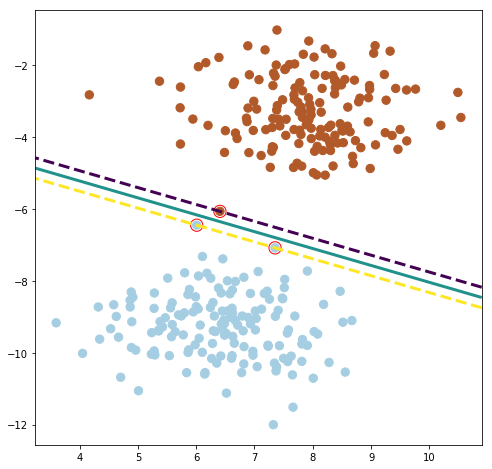

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.datasets import make_blobs

plt.figure(figsize=(8,8))

np.random.seed(6)
n_samples=300
X,y=make_blobs(n_samples=n_samples,centers=2)

clf=svm.SVC(kernel='linear',C=1000)
clf.fit(X,y)

plt.scatter(X[:,0],X[:,1],c=y,s=70,cmap=plt.cm.Paired_r)

ax=plt.gca()
xlim=ax.get_xlim()
ylim=ax.get_ylim()

xx=np.linspace(xlim[0],xlim[1],30)
yy=np.linspace(ylim[0],ylim[1],30)
XX,YY=np.meshgrid(xx,yy)
XX_column=XX.reshape(-1)
YY_column=YY.reshape(-1)
XXYY=np.vstack((XX_column,YY_column)).T
Z=clf.decision_function(XXYY).reshape(XX.shape)

ax.contour(XX,YY,Z,c=['r','k','g'],levels=[-1,0,1],alpha=1,linestyles=['--','-','--'],linewidths=3.0)
ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=150,facecolors='none',edgecolor='r')

### 5.1.4 Soft margin SVM
So far, we have assumed that the training data points are linearly separable. In practice, however, the data points may overlap,in which case exact separation of the training data can lead to poor generalization.We therefore need a way to modify the support vector machine so as to allow some of the training points to be misclassified. To do this, we introduce **slack variables** $\xi_i \geq 0$ for each training data point. 
* **Type 1 points :** $\xi_i=0$  for data points that are on or inside the correct margin boundray 
* **Type 2 points :** $0 \leq \xi_i \leq 1$  for data points lie inside the margin, but on the correct side of the decision boundary
* **Type 3 points :** $\xi_i >1 $ for data points lie on the wrong side of the decision boundary and are misclassified.
<img src="imgs/1.png" alt="drawing" width="300"/>

Our goal is now to maximize the margin while bound the number of misclassified points, which means
$$
\begin{cases}
\underset{\vec{w},b}{min}\,\frac{1}{2}\|\vec{w}\|^2 + C\sum_{i=1}^N \xi_i \\
st \quad (\vec{w}^T\vec{x}_i+b)y_i \geq 1-\xi_i \quad i=1,2,3,\ldots,N \\
\xi_i \geq 0
\end{cases}
$$
where the parameter $C >0 $ controls trade-off between the slack variable penalty and the margin. The $\sum_{i=1}^N \xi_i$ can be viewed as an upper bound on the number of misclassified points.

The Lagrange function is as follows
$$
L(\vec{w},b,\xi_i,\lambda_i,\alpha_i) =\frac{1}{2}\|\vec{w}\|^2+C\sum_{i=1}^N \xi_i+\sum_{i=1}^N\lambda_i \left(1-\xi_i-(\vec{w}^T\vec{x}_i+b)y_i\right)+\sum_{i=1}^N \alpha_i(-\xi_i)
$$
The dual problem is
$$
\underset{\lambda_i \geq 0,\alpha_i \geq 0}{max}\,\,\underset{\vec{w},b,\xi_i}{min}\, L(\vec{w},b,\xi_i,\lambda_i,\alpha_i)=\underset{\lambda_i \geq 0,\alpha_i \geq 0}{max}\,d(\lambda_i,\alpha_i)
$$
which satisfies that
$$
\begin{cases}
\frac{\partial L(\vec{w},b,\xi_i,\lambda_i,\alpha_i)}{\partial \vec{w}}=\vec{w}-\sum_{i=1}^N\lambda_iy_i\vec{x}_i=0 \\
\frac{\partial L(\vec{w},b,\xi_i,\lambda_i,\alpha_i)}{\partial b}=-\sum_{i=1}^N \lambda_iy_i=0 \\
\frac{\partial L(\vec{w},b,\xi_i,\lambda_i,\alpha_i)}{\partial \xi_i}=-\lambda_i-\alpha_i+C=0 \\
\end{cases}
$$
Then we can get the dual problem
\begin{align}
&\underset{\lambda_i}{max}\,d(\lambda_i) \\
&st\quad  0 \leq \lambda_i \leq C \quad \sum_{i=1}^N \lambda_iy_i=0 \\
& \text{where}\quad d(\lambda_i)=\sum_{i=1}^N \lambda_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jy_iy_j\vec{x}_i^T\vec{x}_j \\
\end{align}
which is just the same as the separable case, except that the constrains are somewhat different.

The corresponding KKT conditions are 
$$
\begin{cases}
\vec{w}+\sum_{i=1}^N\lambda_i(-y_i\vec{x}_i)=0  \\
\sum_{i=1}^N \lambda_iy_i=0 \\
C=\lambda_i+\alpha_i \\
\xi_i \geq 0  \\
\alpha_i \xi_i =0 \\
1-\xi_i-y_i(\vec{w}^T\vec{x}_i+b) \leq 0 \quad i=1,2,\ldots,N \\
\lambda_i\left(1-\xi_i-y_i(\vec{w}^T\vec{x}_i+b)\right)=0 \quad i=1,2,\ldots,N \\
\end{cases}
$$

We can now interpret the resulting solution. There are three types of points
* Data points inside the correct margin boundray, which means $\xi_i=0$ and $ y_i(\vec{w}^T\vec{x}_i+b)>1 $.So we have $\lambda_i=0$, which has no effect on the model.
* Data points on the margin boundray, which means $\xi_i=0$ and $ y_i(\vec{w}^T\vec{x}_i+b)=1 $. So we have $\lambda_i>0$ and $\alpha_i>0$, which has effect on the model. 
* Data points lie inside the margin and can either be correctly classified if $\xi_i<1$ or misclassified if $\xi_i>1$. So we have $\alpha_i=0$ and $\lambda_i=C$,which has effect on the model.

The second and third kind of data points with $\lambda_i>0$  constitute the support vectors.

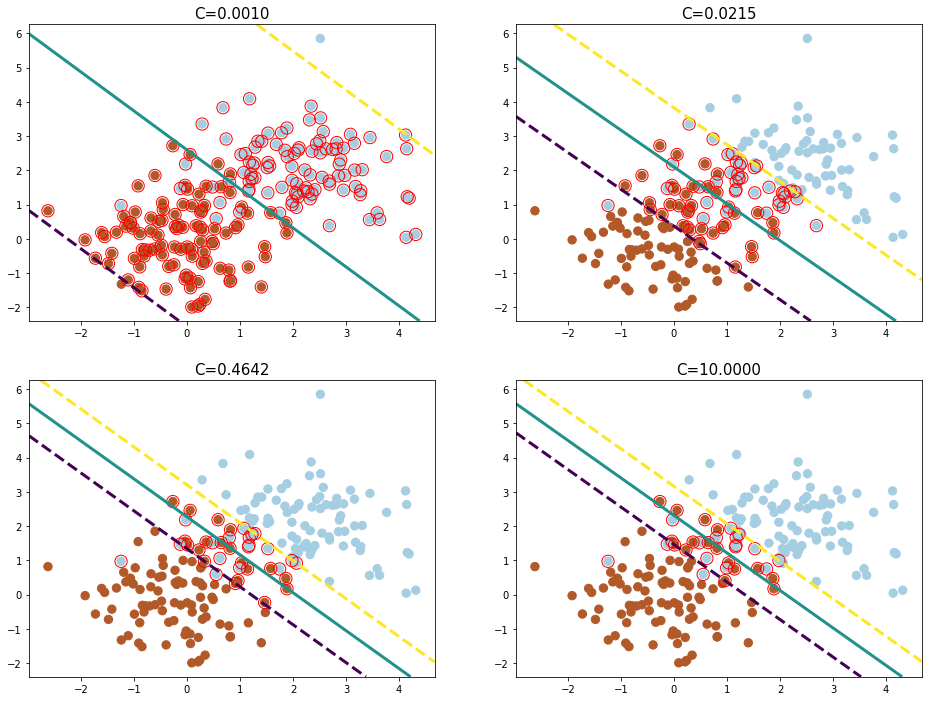

In [73]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm
from sklearn.datasets import make_blobs
plt.figure(figsize=(16,12))
np.random.seed(42)

n_samples=200
X,y=make_blobs(n_samples=n_samples,centers=np.array([[0.0,0.0],[2.0,2.0]]))
penalty=np.logspace(-3,1,4)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.scatter(X[:,0],X[:,1],c=y,s=70,cmap=plt.cm.Paired_r)
    clf=svm.SVC(kernel='linear',C=penalty[i])
    clf.fit(X,y)
    
    ax=plt.gca()
    x_lim=ax.get_xlim()
    y_lim=ax.get_ylim()
    XX=np.linspace(x_lim[0],x_lim[1],30)
    YY=np.linspace(y_lim[0],y_lim[1],30)
    XX,YY=np.meshgrid(XX,YY)
    XXYY=np.vstack((XX.reshape(-1),YY.reshape(-1))).T
    Z=clf.decision_function(XXYY).reshape(XX.shape)
    
    plt.contour(XX,YY,Z,levels=[-1,0,1],linewidths=3.0,linestyles=['--','-','--'])
    plt.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],s=150,facecolor='none',edgecolor='r')
    plt.title("C=%.4f"%penalty[i],fontsize=15)
    
    

### 5.1.5 Loss function for SVM
From the dual problem of soft margin SVM, we have
$$
\xi_i =
\begin{cases}
0 & \text{if}\quad 1-y_i(\vec{w}^T\vec{x}+b)<0 \\
1-y_i(\vec{w}^T\vec{x}_i+b)  & \text{otherwise} \\
\end{cases}
$$
So the objective function of soft margin SVM can be rewritten as 
\begin{align}
&\frac{1}{2}\|\vec{w}\|^2+C\sum_{i=1}^N \xi_i \\
=&\frac{1}{2}\|\vec{w}\|^2+C\sum_{i=1}^N \left(1-y_i(\vec{w}^T\vec{x}_i+b)\right)_+ \\ 
\end{align}
where we have defined the **hinge loss** 
\begin{align}
L_{hinge}(y,\hat{f}) &=max(0,1-y\hat{f})=(1-y\hat{f})_+  \\
f &=\vec{w}^T\vec{x}+b 
\end{align}
We can see that the hinge loss lead to the sparse solution of SVM.

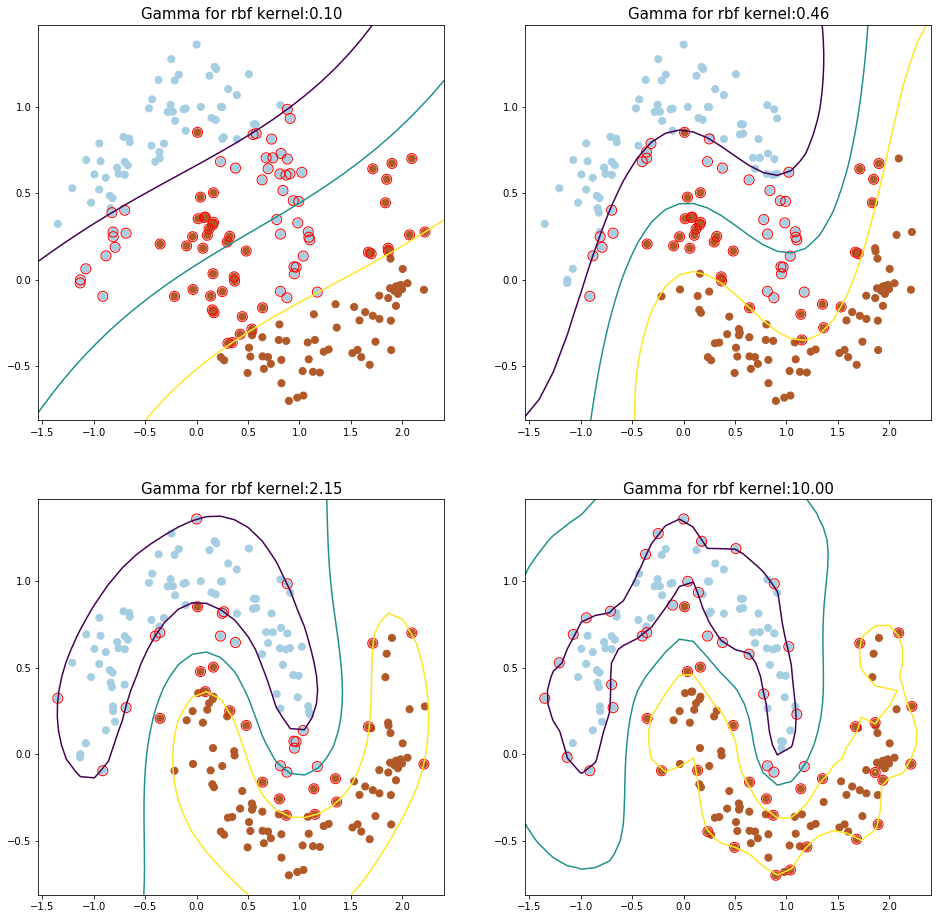

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm 
from sklearn.datasets import make_moons
plt.figure(figsize=(16,16))
np.random.seed(42)

n_samples=200
X,y=make_moons(n_samples=n_samples,noise=0.15)

gamma=np.logspace(-1,1,4)

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.scatter(X[:,0],X[:,1],c=y,s=50,cmap=plt.cm.Paired)
    
    clf=svm.SVC(C=1.0,gamma=gamma[i])
    clf.fit(X,y)
    
    ax=plt.gca()
    x_lim=ax.get_xlim()
    y_lim=ax.get_ylim()
    XX=np.linspace(x_lim[0],x_lim[1],30)
    YY=np.linspace(y_lim[0],y_lim[1],30)
    XX,YY=np.meshgrid(XX,YY)
    XXYY=np.vstack((XX.reshape(-1),YY.reshape(-1))).T
    Z=clf.decision_function(XXYY).reshape(XX.shape)
    
    ax.contour(XX,YY,Z,levels=[-1,0,1])
    ax.scatter(clf.support_vectors_[:,0],clf.support_vectors_[:,1],facecolor='none',edgecolor='r',s=100)
    ax.set_title("Gamma for rbf kernel:%.2f"%gamma[i],fontsize=15)

### 5.1.6 Relation to logistic regression
The SVM can be viewed as minimizing
$$
J(\vec{w})=\frac{1}{2C}\|\vec{w}\|^2+\sum_{i=1}^N \left(1-y_if_i\right)_+
$$
The logistic regression can be viewed as minimizing
$$
J(\vec{w})=\lambda\|\vec{w}\|^2+\sum_{i=1}^N log\,\left(1+exp(-y_if_i)\right)
$$
where $f_i=\vec{w}^T\vec{x}_i+b$

So we can see that the difference of logistic regression and SVM is mainly at the loss function.  We may assume that $y_i=1$ and plot the loss function respect to $f_i$ as follows.

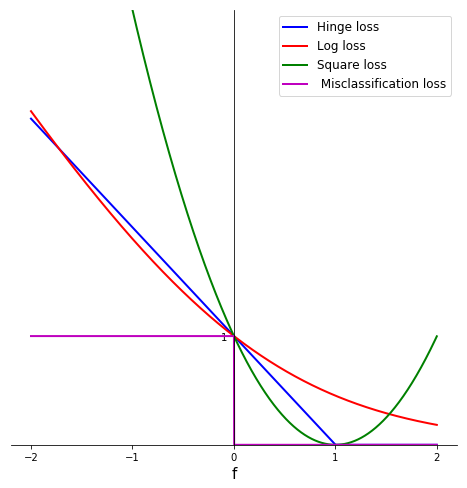

In [48]:
import matplotlib.pyplot as plt
import numpy as np

def hinge_loss(f):
    return np.maximum(0,1-f)

def logit_loss(f):
    return np.log(1+np.exp(-f))/np.log(2)  # log(2) is just for comparison convenient

def square_loss(f):
    return np.square(1-f)

def misclassification_loss(f):
    return  (1-np.sign(f))/2.0

fig=plt.figure(figsize=(8,8))
ax=fig.add_subplot(1,1,1)
# Move left y-axis and bottim x-axis to centre, passing through (0,0)
ax.spines['left'].set_position('center')
ax.spines['bottom'].set_position('zero')

# Eliminate upper and right axes
ax.spines['right'].set_color('none')
ax.spines['top'].set_color('none')

# Show ticks in the left and lower axes only
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')

x=np.arange(-2,2,0.001)
loss_hinge=hinge_loss(x)
loss_log=logit_loss(x)
loss_square=square_loss(x)
loss_misclassification=misclassification_loss(x)

ax.plot(x,loss_hinge,c='b',linewidth=2.0)
ax.plot(x,loss_log,c='r',linewidth=2.0)
ax.plot(x,loss_square,c='g',linewidth=2.0)
ax.plot(x,loss_misclassification,c='m',linewidth=2.0)

ax.xaxis.set_ticks(np.arange(-2,3,1))
ax.set_ylim([0,4])
ax.yaxis.set_ticks([1.0])
ax.set_xlabel("f",fontsize=15)
ax.legend(["Hinge loss","Log loss","Square loss"," Misclassification loss"],fontsize=12)

### 5.1.7 Multiclass SVMs
The support vector machine is fundamentally a two-class classifier. Various methods have been proposed for combining multiple two-class SVMs in order to build a multiclass classifier.
* *One-versus-the-rest* approach: construct $K$ separate SVMs, in which the $k$-th model is trained using the data from class $\mathcal{C}_k$ as the positive examples and the data from the remaining $K-1$ classes as the negative examples. But this approach has the problem that an input might be assigned to multiple classes simultaneously. Another problem with this approach is that the training sets are imbalanced, which means positive samples might be much less than negative samples.
* *One-versus-one* approach: train $K(K-1)/2$ different 2-class SVMs on all possible pairs of classes, and then to classify test points according to which class has the highest number of "votes". This approach requires significantly more training time than the *One-versus-the-rest* approach when $K$ is large.

In [85]:
import matplotlib.pyplot as plt
from sklearn import datasets,svm,metrics
from sklearn.model_selection import train_test_split

digits=datasets.load_digits()
images,labels=digits.images,digits.target

images=images.reshape(images.shape[0],-1)
images_train,images_test,labels_train,labels_test=train_test_split(images,labels,train_size=0.7)

clf=svm.SVC(gamma=0.001)
clf.fit(images_train,labels_train)

predicted=clf.predict(images_test)
print(metrics.classification_report(labels_test,predicted))

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.98      1.00      0.99        59
          2       1.00      1.00      1.00        54
          3       1.00      1.00      1.00        60
          4       1.00      0.98      0.99        51
          5       1.00      0.97      0.98        65
          6       0.98      1.00      0.99        50
          7       1.00      0.98      0.99        55
          8       0.98      0.98      0.98        53
          9       0.96      1.00      0.98        43

avg / total       0.99      0.99      0.99       540



## 5.2 SVMs for regression
We now extend support vector machines to regression problems while at the same time preserving the property of sparseness. In simple linear regression, we minimize a regularized error function given by
$$
J(\vec{w},b)=\frac{1}{2}\sum_{i=1}^N(y_i-f_i)^2+\lambda\|\vec{w}\|^2
$$
where $f_i=\vec{w}^T\vec{x}_i+b$

To obtain sparse solutions, the quadratic error function is replaced by an $\epsilon$*-insensitive error function*, which is given by
$$
E_\epsilon(y-f)=
\begin{cases}
0, & \text{if}\quad |y-f|<\epsilon \\
|y-f|-\epsilon, & \text{otherwise}\\
\end{cases}
$$
We therefore minimize a regularized error function given by
$$
J(\vec{w},b)=C\sum_{n=1}^NE_\epsilon(y_i-f_i)+\frac{1}{2}\|\vec{w}\|^2
$$
### 5.2.1 Dual representation
As before, we can re-express the optimization problem by introducing slack variables, which becomes
$$
\begin{cases}
&\underset{\vec{w},b}{min}\,C\sum_{i=1}^N(\xi_i+\hat{\xi}_i)+\frac{1}{2}\|\vec{w}\|^2 \\
&f_i-\epsilon-\hat{\xi}_i \leq y_i \leq f_i+\epsilon+\xi_i \\
&\hat{\xi}_i \geq 0 \\
&\xi_i \geq 0
\end{cases}
$$
where $f_i=\vec{w}^T\vec{x}_i+b$
<img src="imgs/2.png" alt="drawing" width="300"/>

This can be achieved by introducing Lagrange multipliers $a_i \geq 0, \hat{a}_i \geq 0, \mu_i \geq 0,\hat{\mu}_i \geq 0$ and optimizing the Lagrangian function
$$
L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w},b,\xi_i,\hat{\xi}_i)=C\sum_{i=1}^N(\xi_i+\hat{\xi}_i)+\frac{1}{2}\|\vec{w}\|^2-\sum_{i=1}^N(\mu_i\xi_i+\hat{\mu}_i\hat{\xi}_i)-\sum_{i=1}^N a_i(f_i+\epsilon+\xi_i-y_i)-\sum_{i=1}^N \hat{a}_i(y_i+\epsilon+\hat{\xi}_i-f_i)
$$
we can get that
$$
\underset{\vec{w},b}{min} \,J(\vec{w},b) \quad  \Longleftrightarrow \quad
\begin{cases}
&\underset{\vec{w},b,\xi_i,\hat{\xi}_i}{min}\,C\sum_{i=1}^N(\xi_i+\hat{\xi}_i)+\frac{1}{2}\|\vec{w}\|^2 \\
&f_i-\epsilon-\hat{\xi}_i \leq y_i \leq f_i+\epsilon+\xi_i \\
&\hat{\xi}_i \geq 0 \\
&\xi_i \geq 0
\end{cases}\quad
\Longleftrightarrow \quad
\underset{\vec{w},b,\xi_i,\hat{\xi}_i}{min}\underset{a_i,\hat{a}_i,\mu_i,\hat{\mu}_i}{max} L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w},b,\xi_i,\hat{\xi}_i)
$$
We can write the min-max problem to max-min problem the same as the SVM for classification as follows.
$$
\underset{\vec{w},b,\xi_i,\hat{\xi}_i}{min}\underset{a_i,\hat{a}_i,\mu_i,\hat{\mu}_i}{max} L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w},b,\xi_i,\hat{\xi}_i) 
\quad \Longleftrightarrow \quad
\begin{cases}
\underset{a_i,\hat{a}_i,\mu_i,\hat{\mu}_i}{max}\underset{\vec{w},b,\xi_i,\hat{\xi}_i}{min} L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w},b,\xi_i,\hat{\xi}_i) \\
L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast)=\underset{\vec{w},b,\xi_i,\hat{\xi}_i}{min}\,L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w},b,\xi_i,\hat{\xi}_i) \\
L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast)=\underset{a_i,\hat{a}_i,\mu_i,\hat{\mu}_i}{max}\,L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast) \\
\end{cases}
$$
which means
$$ L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast)=\underset{\vec{w},b,\xi_i,\hat{\xi}_i} {min}\,L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w},b,\xi_i,\hat{\xi}_i) \quad \Longleftrightarrow \quad
\begin{cases}
\frac{\partial}{\partial \vec{w}}L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w},b,\xi_i,\hat{\xi}_i)=0 \quad \Longleftrightarrow \quad  \vec{w}=\sum_{i=1}^N(a_i^\ast-\hat{a}_i^\ast)\vec{x}_i \\
\frac{\partial}{\partial b}L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w},b,\xi_i,\hat{\xi}_i)=0 \quad \Longleftrightarrow \quad \sum_{i=1}^N (a_i^\ast-\hat{a}_i^\ast)=0 \\
\frac{\partial}{\partial \xi_i}L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w},b,\xi_i,\hat{\xi}_i)=0 \quad \Longleftrightarrow \quad a_i^\ast+\mu_i^\ast=C \\
\frac{\partial}{\partial \hat{\xi}_i}L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w},b,\xi_i,\hat{\xi}_i)=0 \quad \Longleftrightarrow \quad \hat{a}_i^\ast+\hat{\mu}_i^\ast=C \\
\end{cases}
$$
and
$$
L(a_i^\ast,\hat{a}_i^\ast,\mu_i^\ast,\hat{\mu}_i^\ast,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast)=\underset{a_i,\hat{a}_i,\mu_i,\hat{\mu}_i}{max}\,L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast) \quad \Longleftrightarrow \quad
\begin{cases}
\frac{\partial}{\partial a_i}L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast)=0 \quad \Longleftrightarrow \quad  \begin{cases} a_i(f_i^\ast+\epsilon+\xi_i^\ast-y_i^\ast)=0 \\ f_i^\ast+\epsilon+\xi_i^\ast-y_i^\ast \geq 0 \end{cases} \\
\frac{\partial}{\partial \hat{a}_i}L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast)=0 \quad \Longleftrightarrow \quad  \begin{cases} \hat{a}_i(y_i^\ast+\epsilon+\hat{\xi}_i^\ast-f_i^\ast)=0 \\ y_i^\ast+\epsilon+\hat{\xi}_i^\ast-f_i^\ast \geq 0 \end{cases} \\
\frac{\partial}{\partial \mu_i}L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast)=0 \quad \Longleftrightarrow \quad  \begin{cases} \mu_i\xi_i^\ast=0 \\ \xi_i^\ast \geq 0 \end{cases} \\
\frac{\partial}{\partial \hat{\mu}_i}L(a_i,\hat{a}_i,\mu_i,\hat{\mu}_i,\vec{w}^\ast,b^\ast,\xi_i^\ast,\hat{\xi}_i^\ast)=0 \quad \Longleftrightarrow \quad  \begin{cases} \hat{\mu}_i\hat{\xi}_i^\ast=0 \\ \hat{\xi}_i^\ast \geq 0 \end{cases} \\
\end{cases}
$$

We can get the dual problem by eliminate the primal variables from the Lagrangian function
$$
\tilde{L}(a_i,\hat{a}_i)=-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N (a_i-\hat{a}_i)(a_j-\hat{a}_j)k(\vec{x}_i,\vec{x}_j)-\epsilon\sum_{i=1}^N(a_i+\hat{a}_i)+\sum_{i=1}^N(a_i-\hat{a}_i)y_i
$$
The constrains are
\begin{align}
&0 \leq a_i \leq C \\
&0 \leq \hat{a}_i \leq C \\
&\sum_{i=1}^N(a_i-\hat{a}_i)=0
\end{align}

From the **KKT conditions**
$$
\begin{cases}
a_i(f_i^\ast+\epsilon+\xi_i^\ast-y_i^\ast)=0  \\
f_i^\ast+\epsilon+\xi_i^\ast-y_i^\ast \geq 0  \\
\hat{a}_i(y_i^\ast+\epsilon+\hat{\xi}_i^\ast-f_i^\ast)=0 \\
y_i^\ast+\epsilon+\hat{\xi}_i^\ast-f_i^\ast \geq 0   \\
\mu_i\xi_i^\ast=0 \\
\xi_i^\ast \geq 0 \\
\hat{\mu}_i\hat{\xi}_i^\ast=0  \\
\hat{\xi}_i^\ast \geq 0
\end{cases}
$$

We can get that the coefficient $a_i$ and $\hat{a}_i$ can only be nonzero if the data point lie on or outside of the $\epsilon$-insensive tube. All points within the tube have $a_i=\hat{a}_i=0$.

The prediction for new inputs can be made using
$$
y(\vec{x})=\sum_{i=1}^N (a_i-\hat{a}_i)k(\vec{x},\vec{x}_i)+b
$$

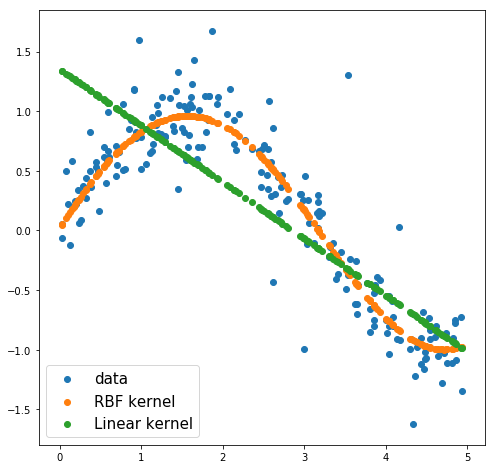

In [113]:
import numpy as np
from sklearn import svm
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
np.random.seed(42)

n_samples=200
X=np.random.rand(n_samples)*5
y=np.sin(X)+0.2*np.random.randn(n_samples)
y[:int(n_samples*0.1)]+=1.0*np.random.randn(int(n_samples*0.1))

X=X.reshape(-1,1)
plt.scatter(X,y)

clf_rbf=svm.SVR(kernel='rbf',C=1e3,gamma=0.1)
clf_linear=svm.SVR(kernel='linear',C=1e3)

rbf_predict=clf_rbf.fit(X,y).predict(X)
linear_predict=clf_linear.fit(X,y).predict(X)

plt.scatter(X[:,0],rbf_predict)
plt.scatter(X[:,0],linear_predict)

plt.legend(["data","RBF kernel","Linear kernel"],fontsize=15)

## 5.3 Sequential Minimal Optimization (SMO) for SVM
The Sequential Minimal Optimization (SMO) algorithm is a effective method to solve the SVM problem. The full description of the algorithm can be found at [Platt's paper](https://pdfs.semanticscholar.org/59ee/e096b49d66f39891eb88a6c84cc89acba12d.pdf).The dual problem for the soft-margin problem is as follows
\begin{align}
&\underset{\lambda_i}{max}\,d(\lambda_i) \\
&st\quad  0 \leq \lambda_i \leq C \quad \sum_{i=1}^N \lambda_iy_i=0 \\
& \text{where}\quad d(\lambda_i)=\sum_{i=1}^N \lambda_i-\frac{1}{2}\sum_{i=1}^N\sum_{j=1}^N \lambda_i\lambda_jy_iy_j\vec{x}_i^T\vec{x}_j \\
\end{align}
The **KKT conditions** are
$$
\begin{cases}
\vec{w}+\sum_{i=1}^N\lambda_i(-y_i\vec{x}_i)=0  \\
\sum_{i=1}^N \lambda_iy_i=0 \\
C=\lambda_i+\alpha_i \\
\xi_i \geq 0  \\
\alpha_i \xi_i =0 \\
1-\xi_i-y_i(\vec{w}^T\vec{x}_i+b) \leq 0 \quad i=1,2,\ldots,N \\
\lambda_i\left(1-\xi_i-y_i(\vec{w}^T\vec{x}_i+b)\right)=0 \quad i=1,2,\ldots,N \\
\end{cases}
$$
which can be re-writen respect to $\lambda_i$ as follows
$$
\begin{cases}
\lambda_i=0 &\quad\Longrightarrow\quad y_i(\vec{w}^T\vec{x}_i+b)\geq 1 \\
\lambda_i=C &\quad\Longrightarrow\quad y_i(\vec{w}^T\vec{x}_i+b) \leq 1 \\
0<\lambda_i <C  &\quad\Longrightarrow\quad y_i(\vec{w}^T\vec{x}_i+b)=1 \\
\end{cases}
$$

The basic intuition of SMO algorithm is that in every iteration, we selects two $\lambda$ parameters $\lambda_i$ and $\lambda_j$ and optimizes the objective value jointly for both these two $\lambda$'s. This process is repeated until the $\lambda$'s converge.